In [26]:
import importlib
import pip
def install(package):
    globals()[package] = importlib.import_module(package)
        
install('pandas')
install('xlrd')
install('matplotlib')
install('numpy')
install('pylab')

import matplotlib.pyplot as plt
import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [128]:
def addtitle(linenum, xshift, yshift):
    x2, y2, _ = proj3d.proj_transform(D[linenum],P[linenum],H[linenum], ax.get_proj())

    label = pylab.annotate(
        Names[linenum], 
        xy = (x2, y2), xytext = (xshift,yshift),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [129]:
# These are the parameters for various plastics.
PPS=[18.8, 4.8, 6.8, 2.8]
Celluose=[18.6, 12.7, 11.0, 7.6]
ChlorinatedPolypropylene=[20.3, 6.3, 5.4, 10.6]
Epoxy=[20.4, 12.0, 11.5, 12.7]
Isopreneelastomer=[16.6, 1.4, -0.8, 9.6]
CelluloseNitrate=[15.4, 14.7, 8.8, 11.5]
Polyamide=[17.4, -1.9, 14.9, 9.6]
Polyisobutylene=[14.5, 2.5, 4.7, 12.7]
PEMA=[17.6, 9.7, 4.0, 10.6]
PMMA=[18.6, 10.5, 7.5, 8.6]
Polystyrene=[21.3, 5.8, 4.3, 12.7]
PVA=[20.9, 11.3, 9.6, 13.7]
PVB=[18.6,4.4,13,10.6]
PVC=[18.2,7.5,8.3,3.5]
Polyester=[21.5,14.9,12.3,16.8]
PES=[19.6,10.8,9.2,6.2]
HumanSkin=[17.6, 12.5, 11.0, 5.0]

Top Three Solvents for aMVL relative Ra=4
['DCM' 'Dimethyl Isosorbide' 'NMP']
Top Three RED Values
[0.6604922406811453 0.6828250141873836 0.6950719387228925]


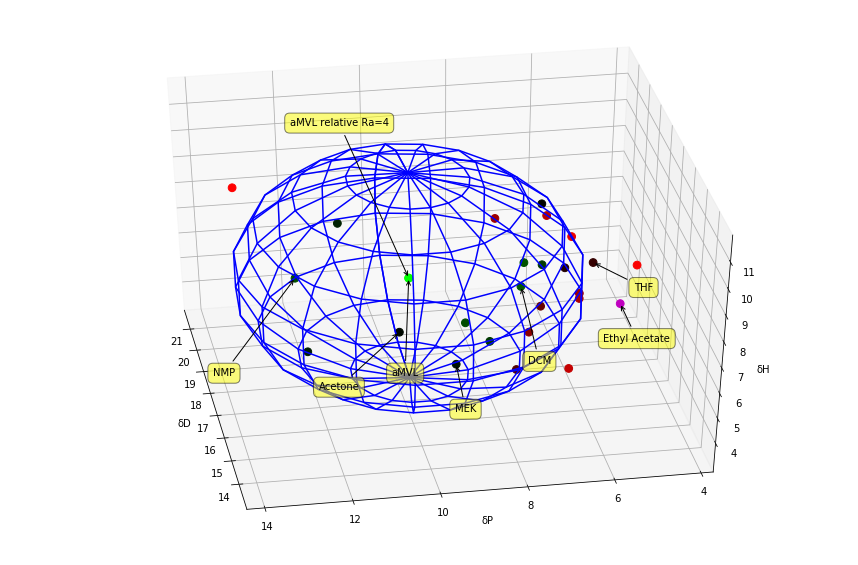

In [209]:
df = pandas.read_excel('Solvents.xls')
Names = df['Solvent'].values
D = df['δD'].values
P = df['δP'].values
H = df['δH'].values
# Calculate the Hansen Solubility

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40, 170)

SelectedPolymer = [D[0], P[0], H[0], 4]
PolymerTitle = 'aMVL relative Ra=4'

# And we want to append this datapoint to the graphed data and draw a sphere around it with RED=1
D = np.append(D, [SelectedPolymer[0]])
P = np.append(P, [SelectedPolymer[1]])
H = np.append(H, [SelectedPolymer[2]])
Names = np.append(Names, PolymerTitle)

# Calculate the Hansen Solubility
Ra = np.sqrt(4*(D-SelectedPolymer[0])**2+(P-SelectedPolymer[1])**2+(H-SelectedPolymer[2])**2)

# The RER is the relative solubility for the chosen polymer. Less than one means soluble in that solvent.
RED = np.array(Ra/SelectedPolymer[3])

# Get green and red values from 0-1 for coloring the dots.
greenvals = np.array(np.maximum(0, np.minimum(1, (1-RED))))
redvals = np.array(np.maximum(0, np.minimum(1, (RED-1))))

colors = []
greenrange = max(greenvals[0:-2])
redrange = max(redvals[0:-2])
for i in range(0, greenvals.size-2):
    colors.append((redvals[i]/redrange, greenvals[i]/greenrange, 0, 1))
colors.append('m')

# Add axes labels.
ax.set_xlabel('δD')
ax.set_ylabel('δP')
ax.set_zlabel('δH')
markersize = 60

ax.scatter(D,P,H, s=markersize, c=colors, marker='o', depthshade=False)

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = SelectedPolymer[0]+SelectedPolymer[3]*np.cos(u)*np.sin(v)
y = SelectedPolymer[1]+SelectedPolymer[3]*np.sin(u)*np.sin(v)
z = SelectedPolymer[2]+SelectedPolymer[3]*np.cos(v)
ax.plot_wireframe(x, y, z, color="b")

# Add titles for the desired chemicals.
#for i in range(0, 25):
#    addtitle(i)
addtitle(0, 10, -100)
addtitle(1, 30, -80)
addtitle(3, -60, -100)
addtitle(13, 60, -30)
addtitle(25, 50, -40)
addtitle(10, -40, -60)
addtitle(9, 20, -50)
addtitle(26, -20, 150)

# Finally, let's produce a list of the best solvents for our chosen polymer.

dtype = [('RED', float), ('D', float), ('P', float), ('H', float), ('Name', 'S22')]
solvents = np.stack([RED, D, P, H, Names])
ind = np.argsort(solvents[0,1:-2])
sorted_solvents = solvents[1:-2,ind]
print("Top Three Solvents for " + PolymerTitle)
print(solvents[4,ind[1:4]])
print("Top Three RED Values")
print(solvents[0,ind[1:4]])

plt.show()

# This shows each of the provided solvents, as well as the chosen polymer and the polymer's solubility radius.
# Dots in green fell within the radius and are solvents for the polymer. Dots in red are insoluble.